In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/potrika-bangla-newspaper-datasets/Potrika-Newspaper Datasets in the Bangla Language/RawDataset/Politics/somoyer_alo_2020_politics_text.csv
/kaggle/input/potrika-bangla-newspaper-datasets/Potrika-Newspaper Datasets in the Bangla Language/RawDataset/Politics/ittefaq_2019_2020_politics_text.csv
/kaggle/input/potrika-bangla-newspaper-datasets/Potrika-Newspaper Datasets in the Bangla Language/RawDataset/Politics/jugantor_2016_2017_politics_text.csv
/kaggle/input/potrika-bangla-newspaper-datasets/Potrika-Newspaper Datasets in the Bangla Language/RawDataset/Politics/jugantor_2018_2020_politics_text.csv
/kaggle/input/potrika-bangla-newspaper-datasets/Potrika-Newspaper Datasets in the Bangla Language/RawDataset/Politics/Inqilab__2016_2020_politics_text.csv
/kaggle/input/potrika-bangla-newspaper-datasets/Potrika-Newspaper Datasets in the Bangla Language/RawDataset/Politics/kaler_kontho_2014_2020_politics_text.csv
/kaggle/input/potrika-bangla-newspaper-datasets/Potrika-Newspaper Dat

In [2]:
import pandas as pd
import os

In [3]:

# Directory path where Kaggle datasets are stored
data_dir = '/kaggle/input/potrika-bangla-newspaper-datasets/Potrika-Newspaper Datasets in the Bangla Language/BalancedDataset'

# List of all the CSV files
file_names = [
    "Economy_40k.csv",
    "Education_40k.csv",
    "Entertainment_40k.csv",
    "International_40k.csv",
    "National_40k.csv",
    "ScienceTechnology_40k.csv",
    "Sports_40k.csv",
    "politics_40k.csv"
]

# Load each CSV into a dictionary of DataFrames
datasets = {}
for file_name in file_names:
    # Define the full path to the file
    file_path = os.path.join(data_dir, file_name)
    # Read the file and store in the dictionary
    df_name = file_name.replace("_40k.csv", "")  # Name without the extension
    datasets[df_name] = pd.read_csv(file_path)

# Optionally, you can concatenate all datasets into a single DataFrame
all_data = pd.concat(datasets.values(), keys=datasets.keys()).reset_index(level=0).rename(columns={'level_0': 'category'})



In [4]:
df = all_data[['article','category']]

In [5]:
df['category'].unique()

array(['Economy', 'Education', 'Entertainment', 'International',
       'National', 'ScienceTechnology', 'Sports', 'politics'],
      dtype=object)

# *Total Number of Rows in our Dataset*

In [6]:
df

,article,category
0,সাভারের কবিরপুর বাণিজ্যিক এলাকার নিজস্ব ফ্যাক্...,Economy
1,\nরিজার্ভ চুরিচলতি বছরের সবচেয়ে চাঞ্চল্যকর ঘটন...,Economy
2,অর্থনৈতিক রিপোর্টার : এসএমই ফাউন্ডেশনের কনফারে...,Economy
3,"ধীরে কমছে চট্টগ্রাম বন্দরের জট। টানা বর্ষণ, ব...",Economy
4,\n\nমোবাইলফোনে কথা বলায় এবার খরচ বাড়ছে। বাজেটে...,Economy
...,...,...
40174,\n\n পরবর্তী কর্মসূচি না দেয়া পর্যন্ত সারা...,politics
40175,\n\n প্রধানমন্ত্রী শেখ হাসিনার নামে ঢাকা বিশ্ব...,politics
40176,\n\n ভাই জিএম কাদেরকে দলের কো-চেয়ারম্যান করা...,politics
40177,\n\n তথ্যমন্ত্রী ও জাসদ সভাপতি হাসানুল হক ইন...,politics


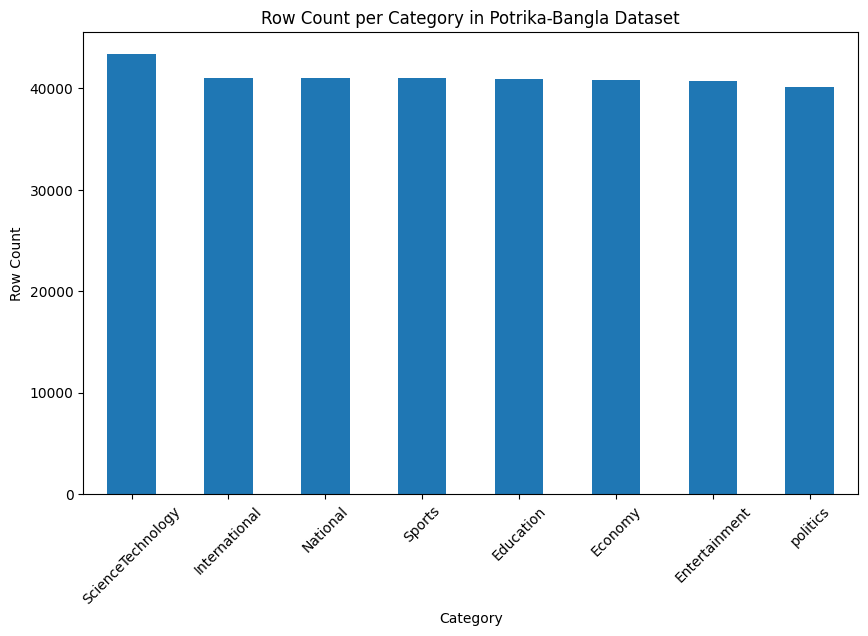

In [7]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['category'].value_counts()  # Replace 'df' with your actual DataFrame name

# Plotting the category counts
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Row Count per Category in Potrika-Bangla Dataset')
plt.xlabel('Category')
plt.ylabel('Row Count')
plt.xticks(rotation=45)
plt.show()


# *Removing all characters except Bangla using Regular Expression*

In [8]:
#importing regular expression module
import re

# Function to clean data by removing unnecessary symbols and numbers
def cleaning_data(row):
    # Removing all characters except Bangla (Unicode \u0980-\u09FF) and removing digits
    headlines = re.sub('[^\u0980-\u09FF]', ' ', str(row))
    headlines = re.sub('\d+', ' ', headlines)  # Removing numbers
    return headlines

# Apply the cleaning function to the 'article' column
df['cleaned'] = df['article'].apply(cleaning_data)

# Remove duplicates from the 'article' column
df.drop_duplicates(subset='article', keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

# Define sample indices to display cleaned data
sample_data = [220, 50, 1]

# Print samples from the cleaned dataset
for i in sample_data:
    print('Original:', df['article'][i], '\nCleaned:', df['cleaned'][i], '\nCategory:', df['category'][i], '\n')


/tmp/ipykernel_23/2776947549.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned'] = df['article'].apply(cleaning_data)


Original: 



 
বাংলাদেশ কৃষি ব্যাংক ও রাজশাহী কৃষি উন্নয়ন ব্যাংকের (রাকাব) শীর্ষ-২০ ঋণ খেলাপি গ্রাহকের কাছ থেকে আদায় হয়েছে মাত্র ২২ কোটি টাকা, যা লক্ষ্যমাত্রার ৭.০৯ শতাংশ। গত অর্থবছর ৩১০ কোটি টাকা আদায়ের লক্ষ্যমাত্রা দিয়েছিল কেন্দ্রীয় ব্যাংক।

অবশ্য শীর্ষ-২০ খেলাপির বাইরে অন্য খেলাপিদের থেকে আদায় সন্তোষজনক পর্যায়ে রয়েছে। তবে উচ্চমাত্রার খেলাপি ঋণ ও মূলধন ঘাটতি ব্যাংক দুটিকে লোকসান থেকে বের হতে দিচ্ছে না। এখন গুণগত মানের ঋণ বিতরণ ও আদায় জোরদারের মাধ্যমে পরিস্থিতির উন্নয়ন করতে বলা হয়েছে।

গত রবিবার বিশেষায়িত খাতের বাংলাদেশ কৃষি ও রাকাবের চেয়ারম্যান ও এমডিদের নিয়ে অনুষ্ঠিত বৈঠকে এসব আলোচনা হয়। বাংলাদেশ ব্যাংকের সভাকক্ষে অনুষ্ঠিত বৈঠকে সভাপতিত্ব করেন গভর্নর ড. আতিউর রহমান। এ সময় ডেপুটি গভর্নর, নির্বাহী পরিচালকসহ বিভিন্ন পর্যায়ের কর্মকর্তারা উপস্থিত ছিলেন। মূলত ব্যাংক দুটির ২০১৪-১৫ অর্থবছরের সার্বিক সূচকের পর্যালোচনা ও উন্নয়নে করণীয় নির্ধারণ বিষয়ে এ বৈঠক ডাকা হয়।

প্রাপ্ত তথ্যে দেখা যায়, জুন শেষে বাংলাদেশ কৃষি ব্যাংকের মূলধন ঘাটতি দাঁড়িয়েছে ছয় হাজার ৬০৭ কোটি টাকা। আগের অর্থবছর শেষে যা চার 

/tmp/ipykernel_23/2776947549.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset='article', keep='first', inplace=True)


In [9]:
df.sample(10)

,article,category,cleaned
47735,\nবিশিষ্ট লেখক এবং শাহজালাল বিজ্ঞান ও প্রযুক্ত...,Education,বিশিষ্ট লেখক এবং শাহজালাল বিজ্ঞান ও প্রযুক্তি...
268607,\nবাংলাদেশের পাকিস্তান সফর নিয়ে বেশ কিছুদিন ধর...,Sports,বাংলাদেশের পাকিস্তান সফর নিয়ে বেশ কিছুদিন ধরে...
72671,কানাডিয়ান বাংলাদেশ বিশ্ববিদ্যালয় ২০১ higher ...,Education,কানাডিয়ান বাংলাদেশ বিশ্ববিদ্যালয় সা...
203432,ইয়াহু প্রযুক্তির বাজারে ভাল সময় কাটাচ্ছে না।...,ScienceTechnology,ইয়াহু প্রযুক্তির বাজারে ভাল সময় কাটাচ্ছে না ...
120204,বলিউডের মোস্ট এলিজিবল ব্যাচেলর সালমান খান। তার...,Entertainment,বলিউডের মোস্ট এলিজিবল ব্যাচেলর সালমান খান তার...
200124,ই-কমার্স ব্যবসার নামে মাত্র ১০ মাসে গ্রাহকদের ...,National,ই কমার্স ব্যবসার নামে মাত্র মাসে গ্রাহকদের ক...
172425,দেশে দেশে মুসলিম নির্যাতনের ভয়াল বিনাশ মোকাবিল...,National,দেশে দেশে মুসলিম নির্যাতনের ভয়াল বিনাশ মোকাবিল...
316100,\nবিএনপিকে নালিশ-অভিযোগের রাজনীতি থেকে বেরিয়ে ...,politics,বিএনপিকে নালিশ অভিযোগের রাজনীতি থেকে বেরিয়ে আ...
177193,\n\nকুড়িগ্রাম জেলা পরিষদ নির্বাচনে ভোটারদের জন...,National,কুড়িগ্রাম জেলা পরিষদ নির্বাচনে ভোটারদের জনপ্...
287972,"বিএনপি নেতারা বলেছেন, বাংলাদেশ ব্যাংকের রিজার্...",politics,বিএনপি নেতারা বলেছেন বাংলাদেশ ব্যাংকের রিজার্...


# *Removing Small Articles < 20*

In [10]:
# Length of each headlines
df['length'] = df['cleaned'].apply(lambda x:len(x.split()))
# Remove the headlines with least words
dataset = df.loc[df.length>20]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Articles".format(len(df)-len(dataset)),
      "\nTotal Articles:",len(dataset))

After Cleaning: 
Removed 1785 Small Articles 
Total Articles: 324967


/tmp/ipykernel_23/1544396601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['cleaned'].apply(lambda x:len(x.split()))


In [11]:
dataset

,article,category,cleaned,length
0,সাভারের কবিরপুর বাণিজ্যিক এলাকার নিজস্ব ফ্যাক্...,Economy,সাভারের কবিরপুর বাণিজ্যিক এলাকার নিজস্ব ফ্যাক্...,157
1,\nরিজার্ভ চুরিচলতি বছরের সবচেয়ে চাঞ্চল্যকর ঘটন...,Economy,রিজার্ভ চুরিচলতি বছরের সবচেয়ে চাঞ্চল্যকর ঘটনা...,989
2,অর্থনৈতিক রিপোর্টার : এসএমই ফাউন্ডেশনের কনফারে...,Economy,অর্থনৈতিক রিপোর্টার এসএমই ফাউন্ডেশনের কনফারে...,130
3,"ধীরে কমছে চট্টগ্রাম বন্দরের জট। টানা বর্ষণ, ব...",Economy,ধীরে কমছে চট্টগ্রাম বন্দরের জট টানা বর্ষণ ব...,371
4,\n\nমোবাইলফোনে কথা বলায় এবার খরচ বাড়ছে। বাজেটে...,Economy,মোবাইলফোনে কথা বলায় এবার খরচ বাড়ছে বাজেটে ম...,194
...,...,...,...,...
324962,\n\n পরবর্তী কর্মসূচি না দেয়া পর্যন্ত সারা...,politics,পরবর্তী কর্মসূচি না দেয়া পর্যন্ত সারাদে...,931
324963,\n\n প্রধানমন্ত্রী শেখ হাসিনার নামে ঢাকা বিশ্ব...,politics,প্রধানমন্ত্রী শেখ হাসিনার নামে ঢাকা বিশ্ববি...,276
324964,\n\n ভাই জিএম কাদেরকে দলের কো-চেয়ারম্যান করা...,politics,ভাই জিএম কাদেরকে দলের কো চেয়ারম্যান করা এ...,226
324965,\n\n তথ্যমন্ত্রী ও জাসদ সভাপতি হাসানুল হক ইন...,politics,তথ্যমন্ত্রী ও জাসদ সভাপতি হাসানুল হক ইনু ...,128


In [12]:
# List of Bangla stopwords (you may expand this list)
# Comprehensive list of Bangla stopwords
bangla_stopwords = [
    'অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 
    'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 
    'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 
    'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 
    'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 
    'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 
    'এস', 'এতে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 
    'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 
    'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 
    'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 
    'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 
    'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও', 'কোনো', 'ক্ষেত্রে', 'কয়েক', 'খুব', 'গিয়ে', 'গিয়েছে', 
    'গিয়ে', 'গুলি', 'গেছে', 'গেল', 'গেলে', 'গোটা', 'চলে', 'চান', 'চায়', 'চার', 'চালু', 'চেয়ে', 
    'চেষ্টা', 'ছাড়া', 'ছাড়াও', 'ছিল', 'ছিলেন', 'জন', 'জনকে', 'জনের', 'জন্য', 'জন্যও', 'জে', 
    'জানতে', 'জানা', 'জানানো', 'জানায়', 'জানিয়ে', 'জানিয়েছে', 'জে', 'টি', 'ঠিক', 'তখন', 'তত', 
    'তথা', 'তবু', 'তবে', 'তা', 'তাঁকে', 'তাঁদের', 'তাঁর', 'তাঁরা', 'তাঁাহারা', 'তাই', 'তাও', 'তাকে', 
    'তাতে', 'তাদের', 'তার', 'তারপর', 'তারা', 'তারৈ', 'তাহলে', 'তাহা', 'তাহাতে', 'তাহার', 'তিনঐ', 
    'তিনি', 'তিনিও', 'তুমি', 'তুলে', 'তেমন', 'তো', 'তোমার', 'থাকবে', 'থাকবেন', 'থাকা', 'থাকায়', 
    'থাকে', 'থাকেন', 'থেকে', 'থেকেই', 'থেকেও', 'দিকে', 'দিতে', 'দিন', 'দিয়ে', 'দিয়েছে', 'দিয়েছেন', 
    'দিলেন', 'দু', 'দুই', 'দুটি', 'দুটো', 'দেওয়া', 'দেওয়ার', 'দেওয়া', 'দেখতে', 'দেখা', 'দেখে', 
    'দেন', 'দেয়', 'দ্বারা', 'ধরা', 'ধরে', 'ধামার', 'নতুন', 'নয়', 'না', 'নাই', 'নাকি', 'নাগাদ', 
    'নানা', 'নিজে', 'নিজেই', 'নিজেদের', 'নিজের', 'নিতে', 'নিয়ে', 'নিয়ে', 'নেই', 'নেওয়া', 'নেওয়ার', 
    'নেওয়া', 'নয়', 'পক্ষে', 'পর', 'পরে', 'পরেই', 'পরেও', 'পর্যন্ত', 'পাওয়া', 'পাচ', 'পারি', 
    'পারে', 'পারেন', 'পি', 'পেয়ে', 'পেয়্র্', 'প্রতি', 'প্রথম', 'প্রভৃতি', 'প্রযন্ত', 'প্রায়', 
    'প্রায়', 'ফলে', 'ফিরে', 'ফের', 'বক্তব্য', 'বদলে', 'বন', 'বরং', 'বলতে', 'বলল', 'বললেন', 'বলা', 
    'বলে', 'বলেছেন', 'বলেন', 'বসে', 'বহু', 'বা', 'বাদে', 'বার', 'বি', 'বিনা', 'বিভিন্ন', 'বিশেষ', 
    'বিষয়টি', 'বেশ', 'বেশি', 'ব্যবহার', 'ব্যাপারে', 'ভাবে', 'ভাবেই', 'মতো', 'মতোই', 'মধ্যে', 
    'মধ্যে', 'মধ্যেই', 'মধ্যেও', 'মনে', 'মাত্র', 'মাধ্যমে', 'মোট', 'মোটেই', 'যখন', 'যত', 
    'যতটা', 'যথেষ্ট', 'যদি', 'যদিও', 'যা', 'যাঁর', 'যাঁরা', 'যাওয়া', 'যাওয়ার', 'যাওয়া', 
    'যাকে', 'যাচ্ছে', 'যাতে', 'যাদের', 'যান', 'যাবে', 'যায়', 'যার', 'যারা', 'যিনি', 'যে', 
    'যেখানে', 'যেতে', 'যেন', 'যেমন', 'র', 'রকম', 'রয়েছে', 'রাখা', 'রেখে', 'লক্ষ', 'শুধু', 
    'শুরু', 'সঙ্গে', 'সঙ্গেও', 'সব', 'সবার', 'সমস্ত', 'সম্প্রতি', 'সহ', 'সহিত', 'সাধারণ', 'সামনে', 
    'সি', 'সুতরাং', 'সে', 'সেই', 'সেখান', 'সেখানে', 'সেটা', 'সেটাই', 'সেটাও', 'সেটি', 'স্পষ্ট', 
    'স্বয়ং', 'হইতে', 'হইবে', 'হইয়া', 'হওয়া', 'হওয়ায়', 'হওয়ার', 'হচ্ছে', 'হত', 'হতে', 
    'হতেই', 'হন', 'হবে', 'হবেন', 'হয়', 'হয়তো', 'হয়নি', 'হয়ে', 'হয়েই', 'হয়েছিল', 'হয়েছে', 
    'হয়েছেন', 'হল', 'হলে', 'হলেই', 'হলেও', 'হলো', 'হাজার', 'হিসাবে', 'হৈলে', 'হোক', 'হয়'
]

# Function to remove stopwords from cleaned text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in bangla_stopwords]
    return ' '.join(filtered_words)

# Apply stopword removal to the 'cleaned' column
df['cleanedwithoutstopwords'] = df['cleaned'].apply(remove_stopwords)

# Display a few cleaned samples to verify
sample_data = [200, 50, 10, 15, 20]
for i in sample_data:
    print('Cleaned without Stopwords:', df['cleanedwithoutstopwords'][i], '\nCategory:', df['category'][i], '\n')


Cleaned without Stopwords: ওয়ালটন বাংলাদেশে তৈরি মোবাইল ফোন প্রথমবারের যুক্তরাষ্ট্রে রফতানি দেশের বাজারে ওয়ালটনের তৈরি মেড ইন বাংলাদেশ ট্যাগ স্মার্টফোনগুলি অ্যাপল স্যামসাংয়ের বিশ্বব্যাপী ব্র্যান্ডগুলির সাথে প্রতিযোগিতা মার্কিন যুক্তরাষ্ট্রের আন্তর্জাতিক ব্র্যান্ড ওয়ালটন স্মার্টফোনটি তৈরি ওয়ালটন ব্র্যান্ডটিকে স্মার্টফোন তৈরি আসল সরঞ্জাম প্রস্তুতকারক ওএম এটিকে দেশের রফতানি খাতে মাইলফলক উল্লেখ এছাড়াও ওয়ালটন অত্যাধুনিক বৈদ্যুতিন সংকেতের বৈদ্যুতিন সংস্থার ইউনিট ভারতে প্রেরণ রবিবার গাজীপুরের চন্দ্রায় ওয়ালটন হাই টেক ইন্ডাস্ট্রিজ লিমিটেডে মার্কিন যুক্তরাষ্ট্রে মোবাইল রফতানি কার্যক্রম পাঁচটি প্রকল্পের উদ্বোধন অর্থমন্ত্রী এএইচএম মোস্তফা কামাল ডাক টেলিযোগাযোগ মন্ত্রী মোস্তফা জব্বার তথ্য যোগাযোগ প্রযুক্তি প্রতিমন্ত্রী জুনাইদ আহমেদ পলক সময় অর্থমন্ত্রী বাংলাদেশের লিফট কারখানার উদ্বোধন সময়ে ভারতে প্রচুর পরিমাণে এসি রফতানি সর্ব ওয়ান ওয়ালটন পিসি ওয়ালটন টিভির নিজস্ব অপারেটিং সিস্টেম আরওএস এছাড়াও ওয়ালটন ডিজি টেক ইন্ডাস্ট্রিজ বাংলাদেশ হাই টেক পার্ক কর্তৃপক্ষের চুক্তি স্বাক্ষরিত চুক্তিটি ওয

/tmp/ipykernel_23/950555016.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleanedwithoutstopwords'] = df['cleaned'].apply(remove_stopwords)


In [13]:
df

,article,category,cleaned,length,cleanedwithoutstopwords
0,সাভারের কবিরপুর বাণিজ্যিক এলাকার নিজস্ব ফ্যাক্...,Economy,সাভারের কবিরপুর বাণিজ্যিক এলাকার নিজস্ব ফ্যাক্...,157,সাভারের কবিরপুর বাণিজ্যিক এলাকার নিজস্ব ফ্যাক্...
1,\nরিজার্ভ চুরিচলতি বছরের সবচেয়ে চাঞ্চল্যকর ঘটন...,Economy,রিজার্ভ চুরিচলতি বছরের সবচেয়ে চাঞ্চল্যকর ঘটনা...,989,রিজার্ভ চুরিচলতি বছরের সবচেয়ে চাঞ্চল্যকর ঘটনা ...
2,অর্থনৈতিক রিপোর্টার : এসএমই ফাউন্ডেশনের কনফারে...,Economy,অর্থনৈতিক রিপোর্টার এসএমই ফাউন্ডেশনের কনফারে...,130,অর্থনৈতিক রিপোর্টার এসএমই ফাউন্ডেশনের কনফারেন্...
3,"ধীরে কমছে চট্টগ্রাম বন্দরের জট। টানা বর্ষণ, ব...",Economy,ধীরে কমছে চট্টগ্রাম বন্দরের জট টানা বর্ষণ ব...,371,ধীরে কমছে চট্টগ্রাম বন্দরের জট টানা বর্ষণ বৈরী...
4,\n\nমোবাইলফোনে কথা বলায় এবার খরচ বাড়ছে। বাজেটে...,Economy,মোবাইলফোনে কথা বলায় এবার খরচ বাড়ছে বাজেটে ম...,194,মোবাইলফোনে কথা বলায় খরচ বাড়ছে বাজেটে মোবাইলফোন...
...,...,...,...,...,...
326747,\n\n পরবর্তী কর্মসূচি না দেয়া পর্যন্ত সারা...,politics,পরবর্তী কর্মসূচি না দেয়া পর্যন্ত সারাদে...,931,পরবর্তী কর্মসূচি দেয়া সারাদেশে টানা অবরোধের ডা...
326748,\n\n প্রধানমন্ত্রী শেখ হাসিনার নামে ঢাকা বিশ্ব...,politics,প্রধানমন্ত্রী শেখ হাসিনার নামে ঢাকা বিশ্ববি...,276,প্রধানমন্ত্রী শেখ হাসিনার নামে ঢাকা বিশ্ববিদ্য...
326749,\n\n ভাই জিএম কাদেরকে দলের কো-চেয়ারম্যান করা...,politics,ভাই জিএম কাদেরকে দলের কো চেয়ারম্যান করা এ...,226,ভাই জিএম কাদেরকে দলের কো চেয়ারম্যান রুহুল আমিন...
326750,\n\n তথ্যমন্ত্রী ও জাসদ সভাপতি হাসানুল হক ইন...,politics,তথ্যমন্ত্রী ও জাসদ সভাপতি হাসানুল হক ইনু ...,128,তথ্যমন্ত্রী জাসদ সভাপতি হাসানুল হক ইনু নির্বাচ...


# *Tokenization of each Document*

In [14]:
import numpy as np
from collections import Counter

def data_summary(dataset):
    """
    This function prints the summary of document, word, and unique word counts 
    per category in the dataset after removing stopwords.
    
    Args:
        dataset: DataFrame with 'cleanedwithoutstopwords' and 'category' columns.
        
    Returns:
        documents: List containing the number of documents per category.
        words: List containing the number of words per category.
        u_words: List containing the number of unique words per category.
        class_label: List of category names.
    """
    documents = []
    words = []
    u_words = []
    
    # Get unique class labels (categories)
    class_label = dataset['category'].unique()
    
    for label in class_label:
        # Word list for each category
        word_list = [word.strip().lower() for text in dataset[dataset['category'] == label]['cleanedwithoutstopwords']
                     for word in text.split()]
        
        # Count word frequency for each category
        word_counts = Counter(word_list)
        
        # Sort word frequency in descending order
        most_common_words = word_counts.most_common(20)
        
        # Documents, total words, and unique words per category
        documents.append(len(dataset[dataset['category'] == label]))
        words.append(len(word_list))
        u_words.append(len(set(word_list)))
        
        # Print summary for each category
        print("\nClass Name:", label)
        print("Number of Documents:", len(dataset[dataset['category'] == label]))  
        print("Number of Words:", len(word_list)) 
        print("Number of Unique Words:", len(set(word_list))) 
        print("Most Frequent Words:\n")
        for word, count in most_common_words:
            print(f"{word}\t{count}")
    
    # Total unique words across the dataset after stopword removal
    total_unique_words = set(word for text in dataset['cleanedwithoutstopwords'] for word in text.split())
    print("\nTotal Number of Unique Words (after stopword removal):", len(total_unique_words))
    
    return documents, words, u_words, class_label

# Call the function
documents, words, u_words, class_names = data_summary(df)



Class Name: Economy
Number of Documents: 40422
Number of Words: 7798155
Number of Unique Words: 168210
Most Frequent Words:

হয়েছে	73106
টাকা	72906
বাংলাদেশ	47825
লাখ	46732
শতাংশ	43701
ব্যাংক	38004
ব্যাংকের	36276
এক	33237
রয়েছে	30023
দেশের	28416
গত	28227
দাম	27924
লেনদেন	23503
প্রধান	21321
পরিচালক	19453
পণ্য	19223
ঋণ	18772
বাংলাদেশের	17946
দশমিক	17797
হিসেবে	17471

Class Name: Education
Number of Documents: 39644
Number of Words: 7211536
Number of Unique Words: 190150
Most Frequent Words:

খ	124856
গ	115879
ক	112551
ঘ	101944
কোনটি	30741
নিচের	24040
এক	22875
বিশ্ববিদ্যালয়ের	22867
হয়েছে	21260
অধ্যাপক	21005
উ	19145
সঠিক	18436
সালে	18275
বিভাগের	18141
যায়	17429
ড	17082
বিশ্ববিদ্যালয়ের	17017
টাকা	16252
ভর্তি	15707
পরীক্ষা	15304

Class Name: Entertainment
Number of Documents: 40615
Number of Words: 5149469
Number of Unique Words: 175098
Most Frequent Words:

হয়েছে	29085
অভিনয়	28001
এক	23695
কথা	19959
গান	17537
খান	16628
ছবি	16547
হয়ে	16198
চলচ্চিত্র	16039
সময়	14850
অভিনেত্রী	14705
বছর	1428

In [15]:
df

,article,category,cleaned,length,cleanedwithoutstopwords
0,সাভারের কবিরপুর বাণিজ্যিক এলাকার নিজস্ব ফ্যাক্...,Economy,সাভারের কবিরপুর বাণিজ্যিক এলাকার নিজস্ব ফ্যাক্...,157,সাভারের কবিরপুর বাণিজ্যিক এলাকার নিজস্ব ফ্যাক্...
1,\nরিজার্ভ চুরিচলতি বছরের সবচেয়ে চাঞ্চল্যকর ঘটন...,Economy,রিজার্ভ চুরিচলতি বছরের সবচেয়ে চাঞ্চল্যকর ঘটনা...,989,রিজার্ভ চুরিচলতি বছরের সবচেয়ে চাঞ্চল্যকর ঘটনা ...
2,অর্থনৈতিক রিপোর্টার : এসএমই ফাউন্ডেশনের কনফারে...,Economy,অর্থনৈতিক রিপোর্টার এসএমই ফাউন্ডেশনের কনফারে...,130,অর্থনৈতিক রিপোর্টার এসএমই ফাউন্ডেশনের কনফারেন্...
3,"ধীরে কমছে চট্টগ্রাম বন্দরের জট। টানা বর্ষণ, ব...",Economy,ধীরে কমছে চট্টগ্রাম বন্দরের জট টানা বর্ষণ ব...,371,ধীরে কমছে চট্টগ্রাম বন্দরের জট টানা বর্ষণ বৈরী...
4,\n\nমোবাইলফোনে কথা বলায় এবার খরচ বাড়ছে। বাজেটে...,Economy,মোবাইলফোনে কথা বলায় এবার খরচ বাড়ছে বাজেটে ম...,194,মোবাইলফোনে কথা বলায় খরচ বাড়ছে বাজেটে মোবাইলফোন...
...,...,...,...,...,...
326747,\n\n পরবর্তী কর্মসূচি না দেয়া পর্যন্ত সারা...,politics,পরবর্তী কর্মসূচি না দেয়া পর্যন্ত সারাদে...,931,পরবর্তী কর্মসূচি দেয়া সারাদেশে টানা অবরোধের ডা...
326748,\n\n প্রধানমন্ত্রী শেখ হাসিনার নামে ঢাকা বিশ্ব...,politics,প্রধানমন্ত্রী শেখ হাসিনার নামে ঢাকা বিশ্ববি...,276,প্রধানমন্ত্রী শেখ হাসিনার নামে ঢাকা বিশ্ববিদ্য...
326749,\n\n ভাই জিএম কাদেরকে দলের কো-চেয়ারম্যান করা...,politics,ভাই জিএম কাদেরকে দলের কো চেয়ারম্যান করা এ...,226,ভাই জিএম কাদেরকে দলের কো চেয়ারম্যান রুহুল আমিন...
326750,\n\n তথ্যমন্ত্রী ও জাসদ সভাপতি হাসানুল হক ইন...,politics,তথ্যমন্ত্রী ও জাসদ সভাপতি হাসানুল হক ইনু ...,128,তথ্যমন্ত্রী জাসদ সভাপতি হাসানুল হক ইনু নির্বাচ...


# *Data Statiscits using Bar Chart*

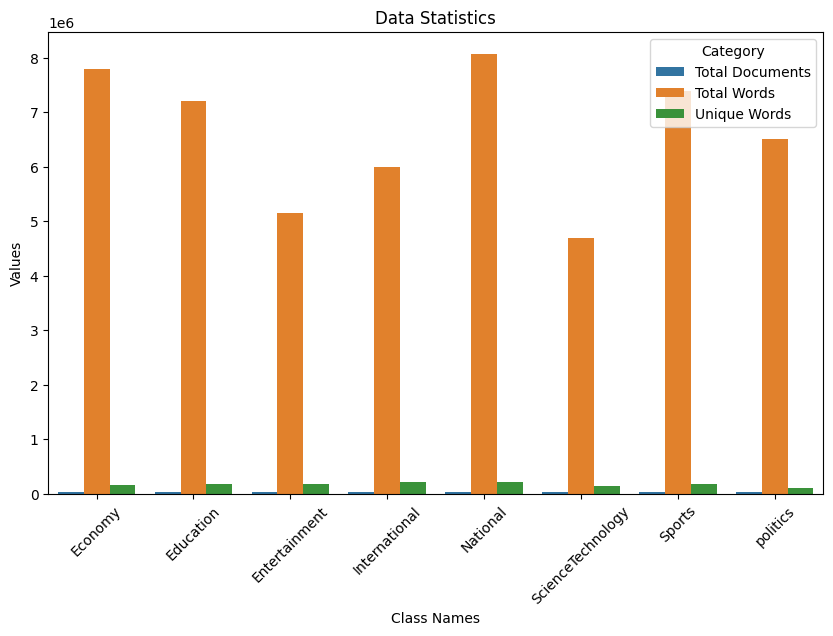

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for plotting
data_matrix = pd.DataFrame({
    'Total Documents': documents,
    'Total Words': words,
    'Unique Words': u_words,
    'Class Names': class_names
})

# Melt the data for seaborn compatibility
df_melted = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Class Names', y='Values', hue='Category')
plt.xlabel('Class Names')
plt.ylabel('Values')
plt.title('Data Statistics')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()




In [17]:
# Calculate the length of each entry in terms of word count after removing stopwords
df['LengthWithoutStopwords'] = df['cleanedwithoutstopwords'].apply(lambda x: len(x.split()))

# Filter rows where the length of 'cleanedwithoutstopwords' is greater than 20
df = df[df['LengthWithoutStopwords'] > 20].reset_index(drop=True)

/tmp/ipykernel_23/222369776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LengthWithoutStopwords'] = df['cleanedwithoutstopwords'].apply(lambda x: len(x.split()))


In [18]:
df = df[['cleanedwithoutstopwords','category']]

# *Final Dataframe to Train our Model* 

In [19]:
df

,cleanedwithoutstopwords,category
0,সাভারের কবিরপুর বাণিজ্যিক এলাকার নিজস্ব ফ্যাক্...,Economy
1,রিজার্ভ চুরিচলতি বছরের সবচেয়ে চাঞ্চল্যকর ঘটনা ...,Economy
2,অর্থনৈতিক রিপোর্টার এসএমই ফাউন্ডেশনের কনফারেন্...,Economy
3,ধীরে কমছে চট্টগ্রাম বন্দরের জট টানা বর্ষণ বৈরী...,Economy
4,মোবাইলফোনে কথা বলায় খরচ বাড়ছে বাজেটে মোবাইলফোন...,Economy
...,...,...
324135,পরবর্তী কর্মসূচি দেয়া সারাদেশে টানা অবরোধের ডা...,politics
324136,প্রধানমন্ত্রী শেখ হাসিনার নামে ঢাকা বিশ্ববিদ্য...,politics
324137,ভাই জিএম কাদেরকে দলের কো চেয়ারম্যান রুহুল আমিন...,politics
324138,তথ্যমন্ত্রী জাসদ সভাপতি হাসানুল হক ইনু নির্বাচ...,politics
